In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

chat = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/twitch/chat.csv')
stream = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/twitch/stream.csv')

print(chat.head())
print(stream.head())

   2015-01-01 18:45:50  70e2b95b5ac0d4c227e46966658d16b3e044996e  \
0  2015-01-01 01:16:57  f2b9065b55fd80d6aa653ce989b489f4ec5198be   
1  2015-01-01 16:22:10  d448ba963d7e1023dd1b0a40b95d4f6611750692   
2  2015-01-01 03:58:13  8d6823dc52b400b50aebf269bf1f03a36d19eeaa   
3  2015-01-01 11:47:35  16c1e39594d62358d27ae604ad43a071f0d86bc4   
4  2015-01-01 17:59:51  6fcc75522de37833a0fb21fba4965aad3b63ea57   

   5c2f5c1f19a7738e16ed0be551d865e8a8fce71d    jerry  BY Unnamed: 5  \
0  0d77740e4fb5ce77d94f9f6c8ef1f762990d0344   elaine  HK        NaN   
1  77ab14c1fb815e1c369ba0cf7d4c56b4fe489997    frank  GB   iphone_t   
2  91cb88c0743761589273fc5e800e7743ece46494    frank  US   iphone_t   
3  51a9234f83d656607cfd7f26690c12d2ffbce353  estelle  DE        NaN   
4  f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0    jerry  RU        NaN   

                             Dota 2  
0  Devil May Cry 4: Special Edition  
1                 League of Legends  
2                 League of Legends  
3           

In [6]:
#the columns of chat data, time
# device_id
# login
# channel
# country
# player
# game

print(chat.columns, '\n')

#the columns of stream data
# time
# device_id
# login
# channel
# country
# player
# game
# stream_format
# subscriber

print(stream.columns, '\n')

Index(['2015-01-01 18:45:50', '70e2b95b5ac0d4c227e46966658d16b3e044996e',
       '5c2f5c1f19a7738e16ed0be551d865e8a8fce71d', 'jerry', 'BY', 'Unnamed: 5',
       'Dota 2'],
      dtype='object') 

Index(['time', 'device_id', 'login', 'channel', 'country', 'player', 'game',
       'stream_format', 'subscriber'],
      dtype='object') 



In [8]:
#2 wha are the unique game's in the stream table?
print(stream.game.unique())

['League of Legends' 'DayZ' 'Dota 2' 'Heroes of the Storm'
 'Counter-Strike: Global Offensive' 'Hearthstone: Heroes of Warcraft'
 'The Binding of Isaac: Rebirth' 'Agar.io' 'Gaming Talk Shows' nan
 'Rocket League' 'World of Tanks' 'ARK: Survival Evolved' 'SpeedRunners'
 'Breaking Point' 'Duck Game' 'Devil May Cry 4: Special Edition'
 'Block N Load' 'Fallout 3' 'Batman: Arkham Knight' 'Reign Of Kings'
 'The Witcher 3: Wild Hunt' 'The Elder Scrolls V: Skyrim'
 'Super Mario Bros.' 'H1Z1' 'The Last of Us' 'Depth' 'Mortal Kombat X'
 'Senran Kagura: Estival Versus' 'The Sims 4' 'You Must Build A Boat'
 'Choice Chamber' 'Music' 'Risk of Rain' 'Grand Theft Auto V' 'Besiege'
 'Super Mario Bros. 3' 'Hektor' 'Bridge Constructor Medieval' 'Lucius'
 'Blackjack' 'Cities: Skylines']


In [9]:
#3 what are the unique channel's in the stream table?
print(stream.channel.unique())

['frank' 'george' 'estelle' 'morty' 'kramer' 'jerry' 'helen' 'newman'
 'elaine' 'susan']


In [3]:
#4 what are the most popular games in the stream table?
stream_popular_games = pd.value_counts(stream.game)

print(stream_popular_games.head(10),'\n')

League of Legends                   193533
Dota 2                               85608
Counter-Strike: Global Offensive     54438
DayZ                                 38004
Heroes of the Storm                  35310
The Binding of Isaac: Rebirth        29467
Gaming Talk Shows                    28115
World of Tanks                       15932
Hearthstone: Heroes of Warcraft      14399
Agar.io                              11480
Name: game, dtype: int64 



In [4]:
#5 where lol stream viewers located?
lol_viewers_location = pd.value_counts(stream.country[stream.game == 'League of Legends'])
print(lol_viewers_location.head())

US    85606
CA    13034
DE    10835
GB     6964
TR     4412
Name: country, dtype: int64


In [5]:
#6 creating a list of player's and their number of streamers
device_stream = pd.value_counts(stream.player)
print(device_stream.head())

site        246115
iphone_t    100689
android      93508
ipad_t       53646
embed        19819
Name: player, dtype: int64


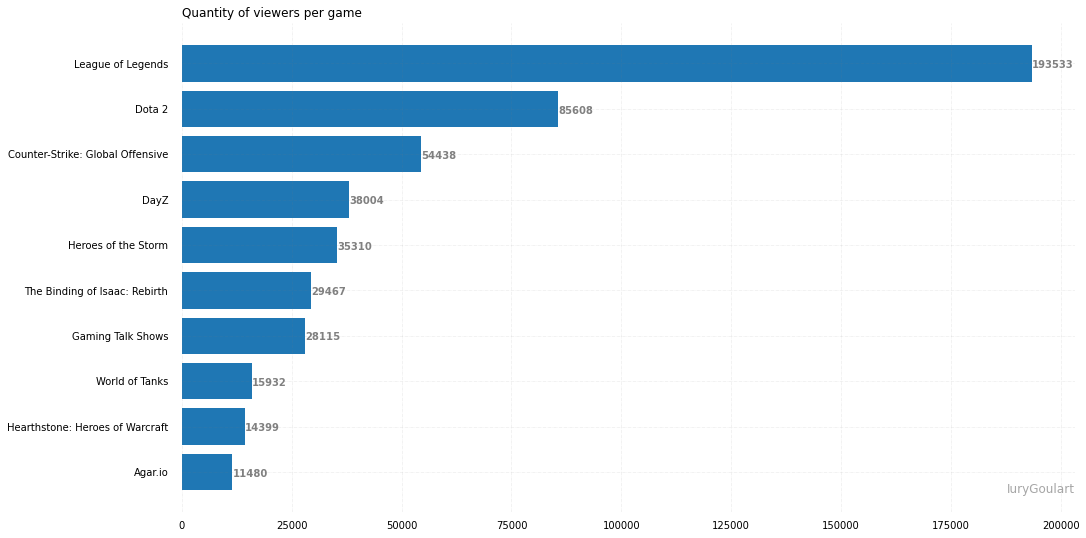

In [42]:
#7 creating a new graph with the 10 most played games (stream_popular_games) at twitch with stream_popular_games as arguments

most_watched_games = pd.value_counts(stream.game).index
name = most_watched_games[0:10]
viewers =  stream_popular_games.values[0:10]

# print(games)
# print(viewers, '\n')

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, viewers)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Quantity of viewers per game',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'IuryGoulart', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
plt.show()

<Figure size 432x288 with 0 Axes>

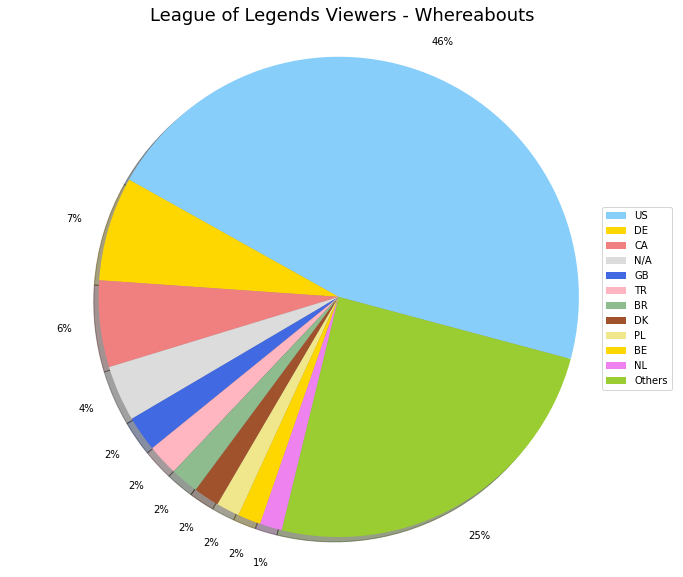

In [10]:
#lets make a pie chart about lol viewers country location
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
country_lol_viewers = lol_viewers_location.index
value_lol_viewers = lol_viewers_location.values
# print(value_lol_viewers, '\n')

others_value = np.sum(value_lol_viewers[11:])
# print(others_value)
labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]
countries = [85606, 13034, 10835,  6964,  4412,  3911,  3533,  3213,  2909,  2885,  2776, others_value]

plt.clf()
plt.figure(figsize=(12, 10))
plt.pie(countries, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)
plt.axis('equal')
plt.title('League of Legends Viewers - Whereabouts', fontsize=18)
plt.legend(labels, loc='right')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


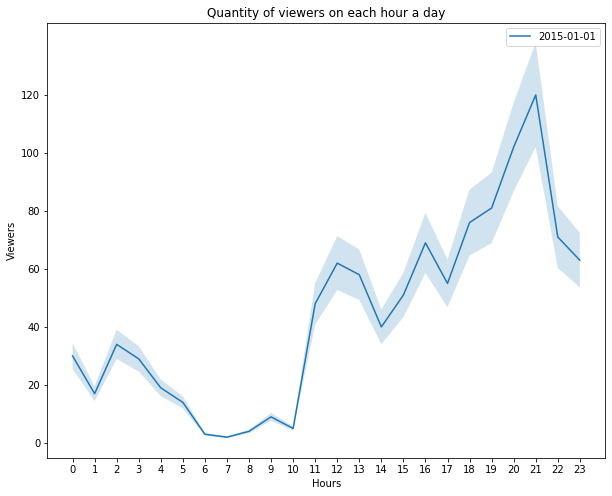

In [30]:
#lets plot a line graph about how much viewers online per hour a day
hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

plt.figure(figsize=(10, 8))
plt.title('Quantity of viewers on each hour a day')
plt.xlabel('Hours')
plt.ylabel('Viewers')

plt.plot(hour, viewers_hour)

plt.legend(['2015-01-01'])

ax = plt.subplot()
ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

#defining a 15% error because there are some people leave their browsers open
y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]

plt.fill_between(hour, y_lower, y_upper, alpha=0.2)

plt.show()